# CAPSTONE PROJECT

## SIFA TOK

In [1]:
# Import necessary libraries;

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
plt.rcParams['figure.figsize'] = [20, 10]
import plotly.express as px
from collections import Counter
import operator
sns.set_palette('Set2')
sns.set_style('darkgrid')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(42)
plt.style.use('ggplot')


In [2]:
#pip install uk-covid19

In [3]:
covid= pd.read_csv("data_2021-Jun-02.csv")
covid.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,overview,United Kingdom,K02000001,2021-06-01,2,127794
1,overview,United Kingdom,K02000001,2021-05-31,3,127792
2,overview,United Kingdom,K02000001,2021-05-30,4,127789
3,overview,United Kingdom,K02000001,2021-05-29,3,127785
4,overview,United Kingdom,K02000001,2021-05-28,4,127782


In [4]:
covid.isnull().sum()

areaType                      0
areaName                      0
areaCode                      0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    0
dtype: int64

In [5]:
covid['Date'] = pd.to_datetime(covid['date'], errors='coerce')
covid['Date'].dtype

dtype('<M8[ns]')

In [6]:
covid.sort_values(by=['Date'], inplace=True, ascending=True)
covid.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Date
456,overview,United Kingdom,K02000001,2020-03-02,1,1,2020-03-02
455,overview,United Kingdom,K02000001,2020-03-03,2,3,2020-03-03
454,overview,United Kingdom,K02000001,2020-03-04,0,3,2020-03-04
453,overview,United Kingdom,K02000001,2020-03-05,3,6,2020-03-05
452,overview,United Kingdom,K02000001,2020-03-06,0,6,2020-03-06


In [7]:
df_covid=covid.rename(columns={'areaName':'Country','newDeaths28DaysByDeathDate':'covid_deaths'})

In [8]:
df=df_covid[['Date','Country', 'covid_deaths']].set_index('Date')

df.head()

,Country,covid_deaths
Date,,
2020-03-02,United Kingdom,1
2020-03-03,United Kingdom,2
2020-03-04,United Kingdom,0
2020-03-05,United Kingdom,3
2020-03-06,United Kingdom,0


In [9]:
series= df.loc[df['Country']=='United Kingdom']
series.drop(['Country'], axis=1, inplace=True)

In [10]:
series.head()

,covid_deaths
Date,
2020-03-02,1
2020-03-03,2
2020-03-04,0
2020-03-05,3
2020-03-06,0


In [11]:
series.tail()

,covid_deaths
Date,
2021-05-28,4
2021-05-29,3
2021-05-30,4
2021-05-31,3
2021-06-01,2


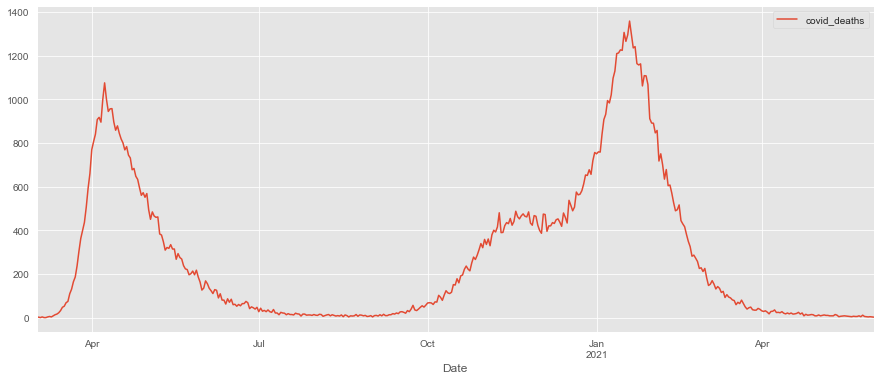

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(figsize=(15, 6))
plt.show()

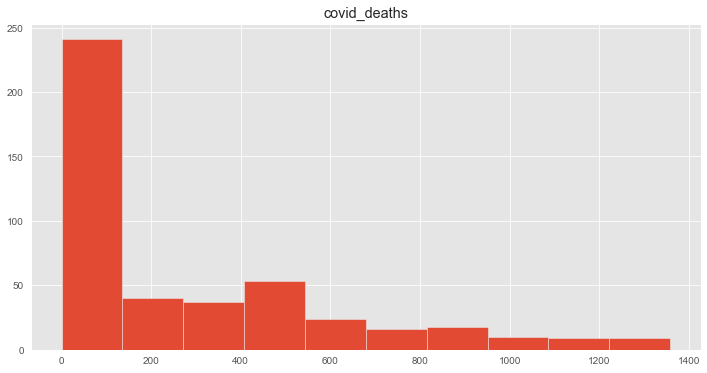

In [13]:
series.hist(figsize = (12,6))
plt.show()

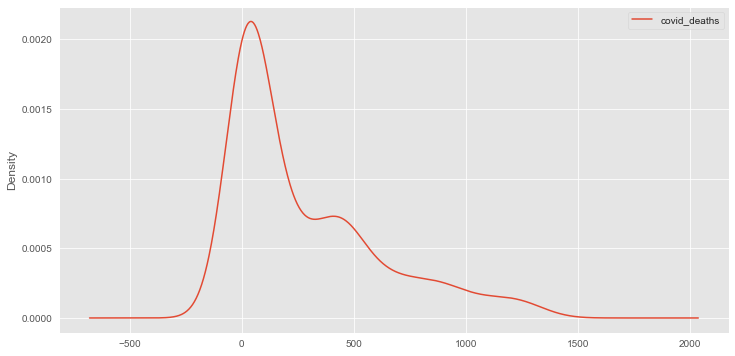

In [14]:
series.plot(kind='kde', figsize = (12,6))
plt.show()
# 0 dan baslat
# kde ile histogrami birlikte de yapabiliriz

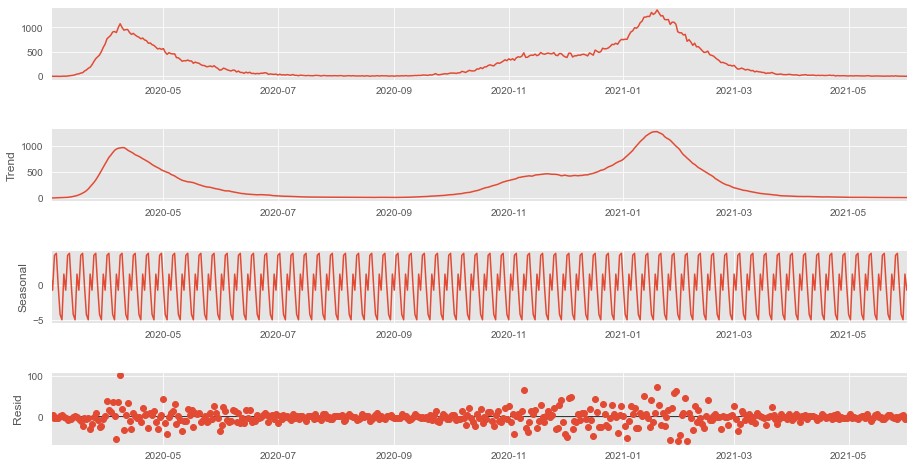

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose



result = sm.tsa.seasonal_decompose(series, model='additive',extrapolate_trend='freq')
fig = result.plot()
fig.set_size_inches(14,7)
plt.show()

In [16]:
def stationarity_check(data):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = data.rolling(window=8, center=False).mean()
    roll_std = data.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(data)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(data, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

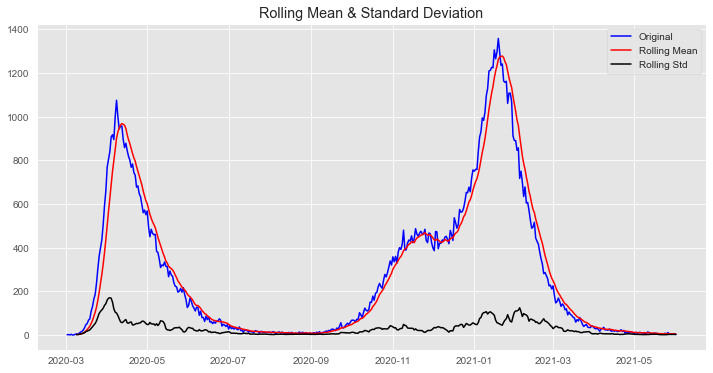

Results of Dickey-Fuller Test: 

Test Statistic                  -2.307435
p-value                          0.169581
#Lags Used                      13.000000
Number of Observations Used    443.000000
Critical Value (1%)             -3.445198
Critical Value (5%)             -2.868086
Critical Value (10%)            -2.570257
dtype: float64


In [17]:
stationarity_check(series)

The red and black lines represent the rolling mean and rolling standard deviations. You can see that the mean is not constant over time, so we can reconfirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.

For a time series model to be stationary, properties of the time-series shouldn't not depend on the time at which the series is observed. One of the indicators of stationarity is low p-value. If the p-value is lower than 0.05, it can be concluded that the series is stationary.

In our model, the p-value is higher than 0.05. The graph shows that there is some degree of trend and seasonality which the SARIMA model can handle.

In [18]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(series)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-2.307434966329036, 0.16958125858514556, 13, 443, {'1%': -3.4451978474132234, '5%': -2.8680864144212057, '10%': -2.5702569996789792}, 4076.4265669374563)


In [19]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.307435
p-value                          0.169581
#Lags Used                      13.000000
Number of Observations Used    443.000000
Critical Value (1%)             -3.445198
Critical Value (5%)             -2.868086
Critical Value (10%)            -2.570257
dtype: float64


The Dickey-Fuller test is a statistical test for testing stationarity. The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. 

A nice print-out of the Dickey-Fuller test can be found below. The p-value is 1 here, so the time series is not stationary!

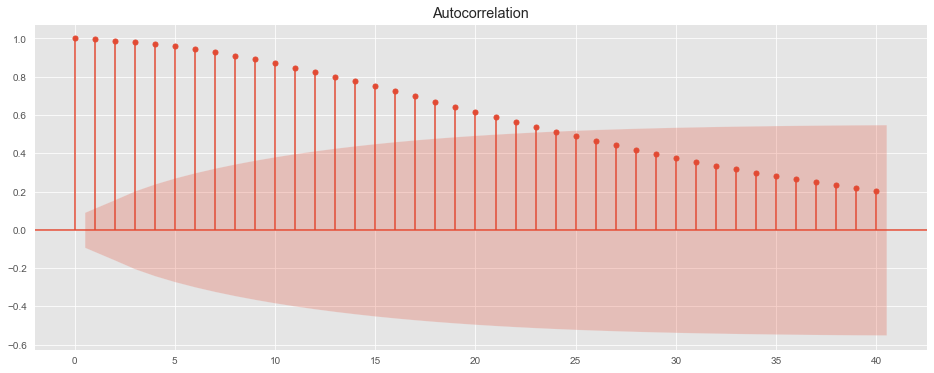

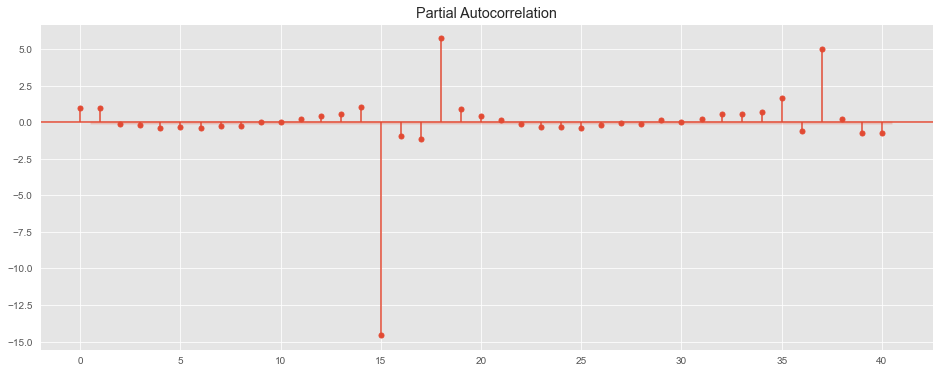

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,6))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,6))
plot_pacf(series, ax=ax, lags=40);

# diff haliyle autocorr bak

In [22]:
import pmdarima as pm
import datetime as dt

#Create auto_arima model
pm_model = pm.auto_arima(series,
                    trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                        seasonal=True, m=7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4230.912, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4375.810, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4350.070, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4355.059, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4373.810, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=4229.981, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=4228.040, Time=0.48 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=4229.971, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=4265.241, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=4294.668, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=4228.219, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=4227.114, Time=0.39 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=4228.632, Time=0.67 sec
 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=4228.685, Time=0.65 sec
 ARIMA(2,1,3)(1,0,1)[7] intercept

This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

The above output suggests that SARIMAX(2, 2, 2)x(0, 2, 2, 7) yields the lowest AIC value of 4028.6. Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [23]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(series, 
                                        order=(1, 1, 3), 
                                        seasonal_order=(0, 0, 0, 7),
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9285      0.013     69.290      0.000       0.902       0.955
ma.L1         -1.1399      0.031    -36.363      0.000      -1.201      -1.078
ma.L2          0.1082      0.050      2.145      0.032       0.009       0.207
ma.L3          0.3158      0.032     10.009      0.000       0.254       0.378
sigma2       607.3754     24.731     24.559      0.000     558.904     655.847


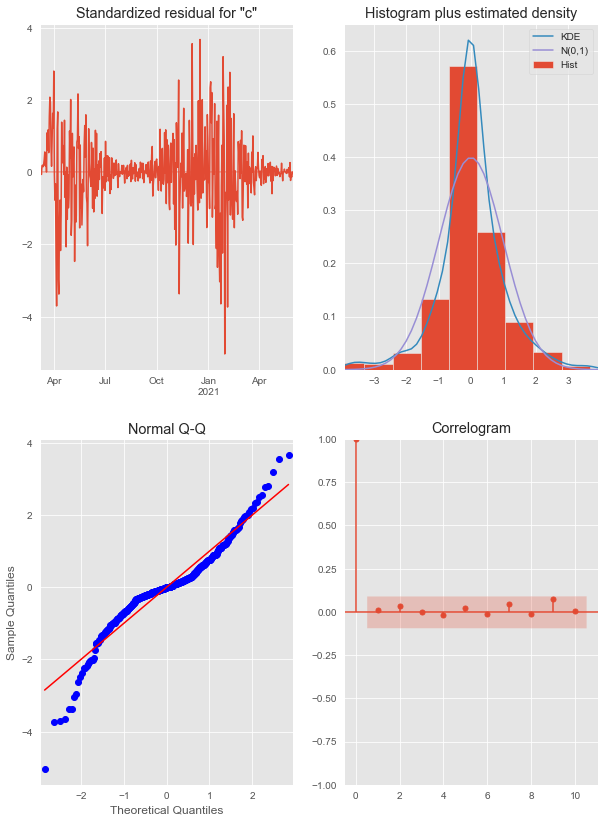

In [24]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(10, 14))
plt.show()

### Forecasting

In [25]:
pred = output.get_prediction(start=pd.to_datetime('2021-03-01'), dynamic=False)
pred_conf = pred.conf_int()

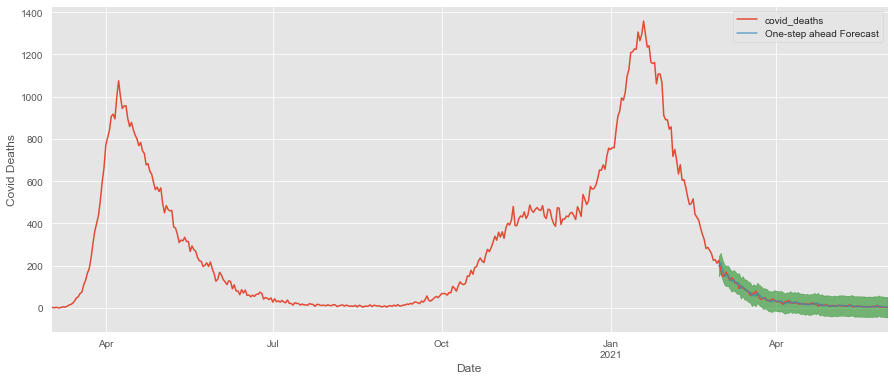

In [26]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')
plt.legend()

plt.show()

In [27]:
# Get the real and predicted values
death_forecasted = pred.predicted_mean
death_truth = df['2021-03-01':]['covid_deaths']

In [28]:
# Compute the mean square error
mse = ((death_forecasted - death_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))

The Mean Squared Error is 79.8


In [29]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2021-03-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

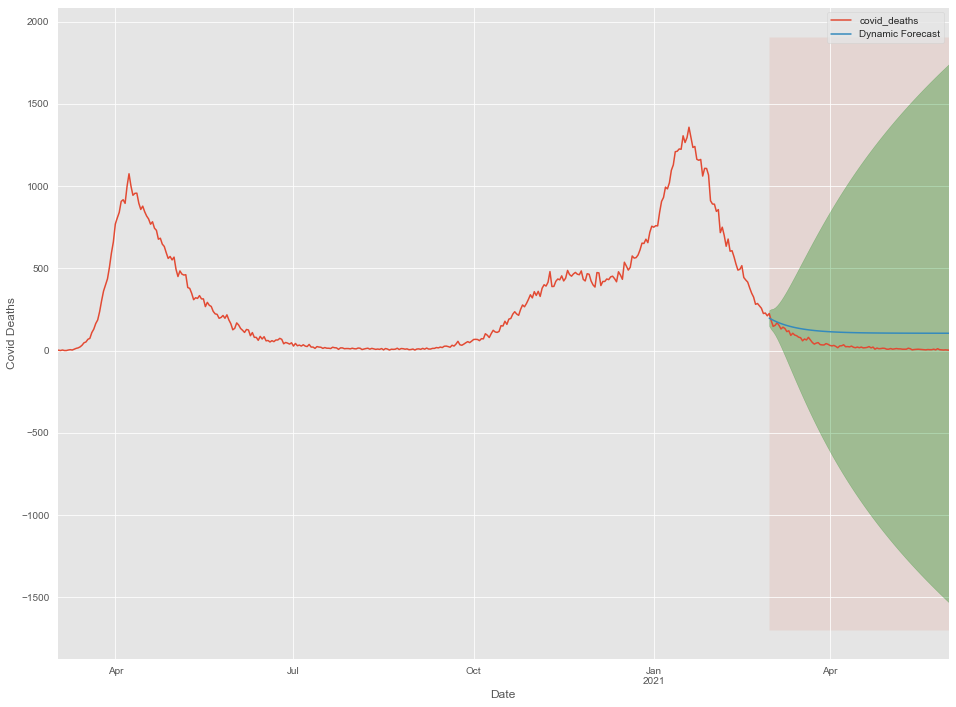

In [30]:
ax = series.plot(label='observed', figsize=(16, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-03-01'), death_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')

plt.legend()
plt.savefig('dynamicforecast.png', dpi=300)
plt.show()

In [31]:
# Extract the predicted and true values of our time series
death_forecasted = pred_dynamic.predicted_mean
death_truth = series['covid_deaths']

# Compute the mean square error
mse = ((death_forecasted - death_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6886.45


In [32]:
# Get forecast 7 steps ahead in future
prediction = output.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

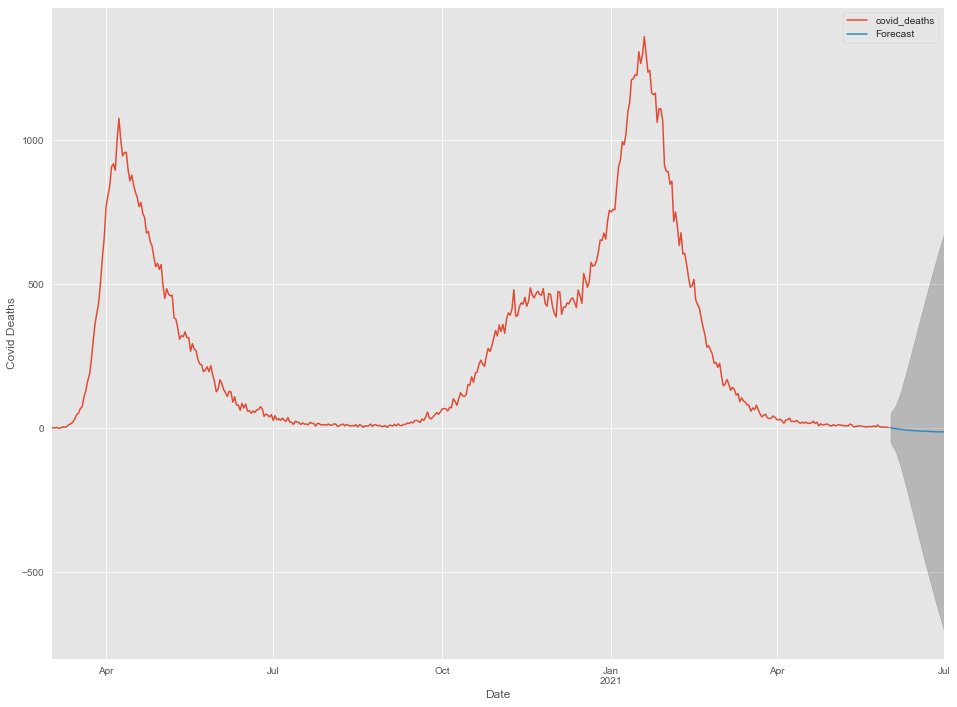

In [33]:
# Plot future predictions with confidence intervals
ax = series.plot(label='observed', figsize=(16, 12))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')

plt.legend()
plt.savefig('forecast.png', dpi=300)
plt.show()

# Google Trends Data

In [34]:
#pip install pytrends

In [35]:
import pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

In [36]:
KEYWORDS=['Stress','Anxiety','Divorce','Suicide', 'Violence'] 
KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
df_CODES= pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/012lyw,Stress,Topic
1,/m/0k_9,Anxiety,Emotional disorder
2,/m/0b03h,Divorce,Topic
3,/m/06z5s,Suicide,Topic
4,/m/0chbx,Violence,Topic


In [37]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2020-01-01 2021-04-01'
COUNTRY=["GB"]                                  #Use this link for iso country code
CATEGORY=0                                      # Use this link to select categories
SEARCH_TYPE='' 

In [38]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)

In [39]:
df_trends

1                 2                  3                  4  \
           /m/012lyw isPartial /m/0k_9 isPartial /m/0b03h isPartial /m/06z5s   
date                                                                           
2020-01-05        61     False      86     False       85     False       34   
2020-01-12        59     False      83     False       92     False       30   
2020-01-19        72     False      83     False       82     False       33   
2020-01-26        57     False      81     False       78     False       28   
2020-02-02        68     False      91     False       84     False       29   
...              ...       ...     ...       ...      ...       ...      ...   
2021-02-28        68     False      89     False       68     False       28   
2021-03-07        61     False      97     False       76     False       35   
2021-03-14        88     False      94     False       79     False       36   
2021-03-21        69     False      98     False       62     False       31   
2021-03-28        67     False      84     False       60     False       31   

                            5            
           isPartial /m/0chbx isPartial  
date                                     
2020-01-05     False       36     False  
2020-01-12     False       37     False  
2020-01-19     False       37     False  
2020-01-26     False       36     False  
2020-02-02     False       38     False  
...              ...      ...       ...  
2021-02-28     False       32     False  
2021-03-07     False       53     False  
2021-03-14     False       56     False  
2021-03-21     False       43     False  
2021-03-28     False       35     False  

[65 rows x 10 columns]

In [40]:
df_trends.columns = df_trends.columns.droplevel(0)                  #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1)                   #drop "isPartial"
df_trends.reset_index(level=0,inplace=True)                         #reset_index
df_trends.columns=['date',
                   'Stress-UK',
                   'Anxiety-UK',
                   'Divorce-UK',
                   'Suicide-UK',
                   'Violence-UK']                                   #change column names

In [41]:
df_trends.head()

,date,Stress-UK,Anxiety-UK,Divorce-UK,Suicide-UK,Violence-UK
0,2020-01-05,61,86,85,34,36
1,2020-01-12,59,83,92,30,37
2,2020-01-19,72,83,82,33,37
3,2020-01-26,57,81,78,28,36
4,2020-02-02,68,91,84,29,38


### Visualize google trends

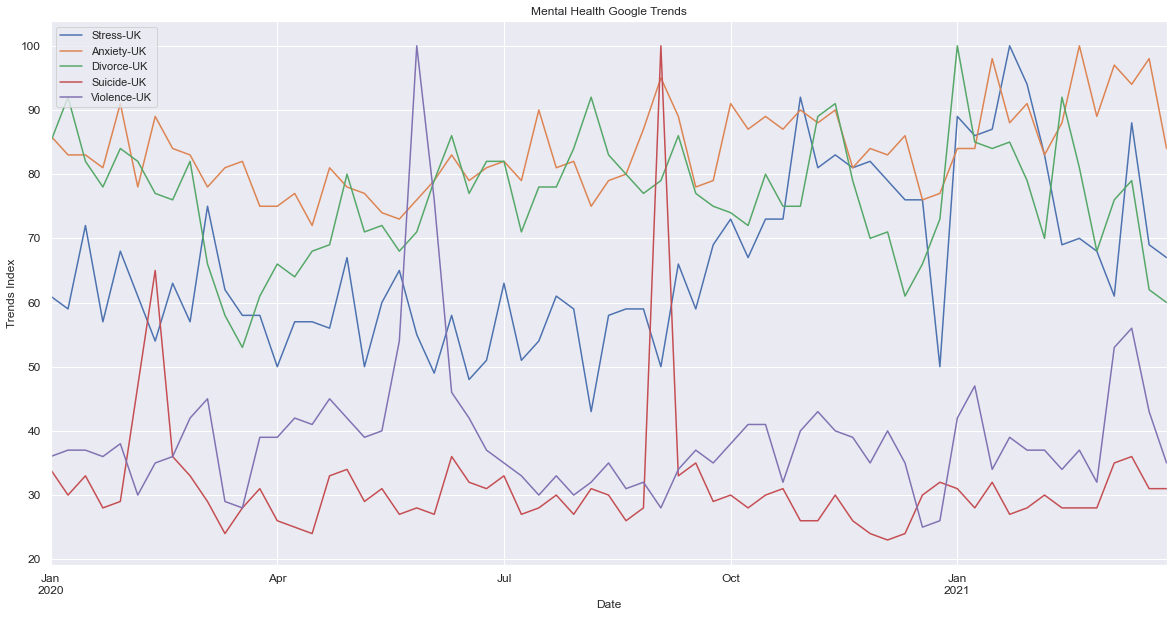

In [42]:
import seaborn as sns
sns.set(color_codes=True)

dx = df_trends.plot(figsize = (20,10),x="date", 
                    y=['Stress-UK','Anxiety-UK','Divorce-UK','Suicide-UK', 'Violence-UK'],
                    kind="line", title = "Mental Health Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=12)

### Smooting the data

In [43]:
df_ = df_trends[['date', 'Stress-UK','Anxiety-UK','Divorce-UK','Suicide-UK', 'Violence-UK']].set_index('date')
df_.head()

,Stress-UK,Anxiety-UK,Divorce-UK,Suicide-UK,Violence-UK
date,,,,,
2020-01-05,61,86,85,34,36
2020-01-12,59,83,92,30,37
2020-01-19,72,83,82,33,37
2020-01-26,57,81,78,28,36
2020-02-02,68,91,84,29,38


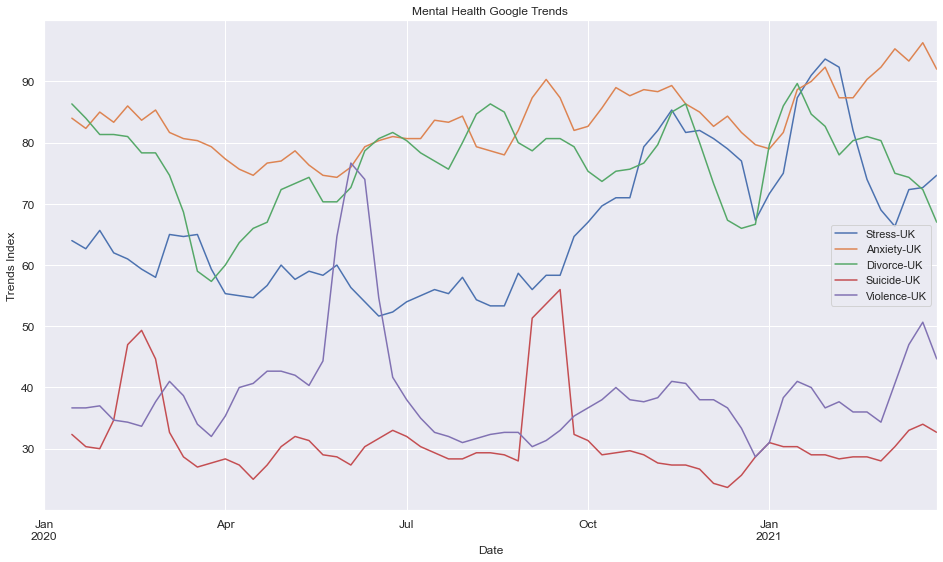

In [47]:
import seaborn as sns
sns.set(color_codes=True)

df_trends.set_index("date", drop=True, inplace=True)

ma = df_trends.rolling(window=3).mean()
dx = ma.plot(figsize = (16,9))

dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.set_title('Mental Health Google Trends')

dx.tick_params(axis='both', which='both', labelsize=12)

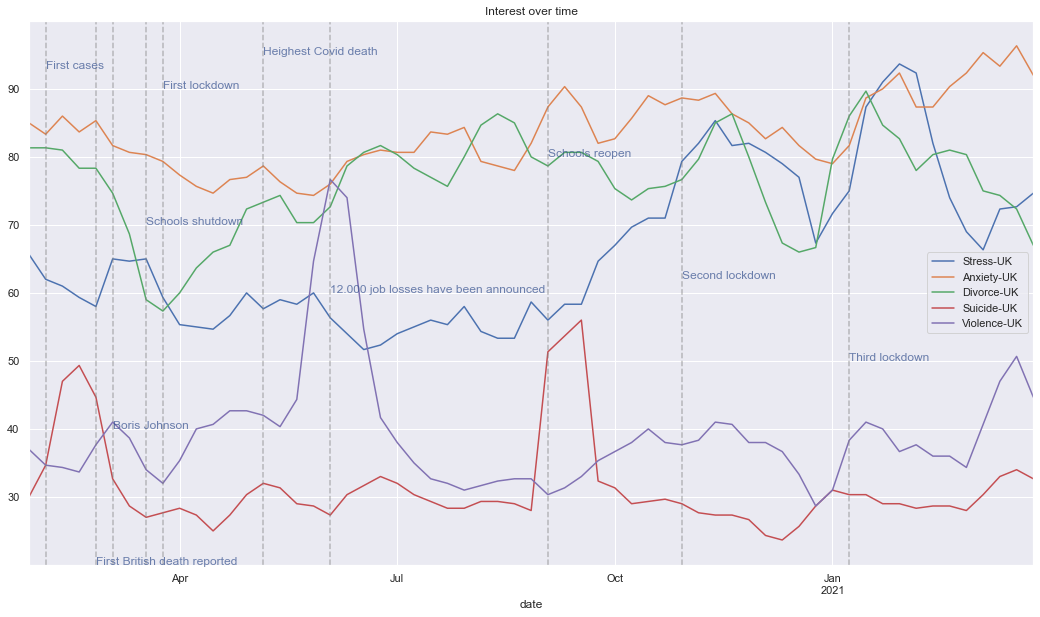

In [54]:
notable_dates = [
    ('2020-02-07', 93, "First cases"),
    ('2020-02-28', 20, "First British death reported"),
    ('2020-03-05', 40, "Boris Johnson"),
    ('2020-03-18', 95, "Schools shutdown"),
    ('2020-03-23', 90, "First lockdown"),
    ('2020-05-05', 95, "Heighest Covid death"),
    ('2020-06-01', 60, "12.000 job losses have been announced"),
    ('2020-09-01', 80, "Schools reopen"),
    ('2020-10-31', 62, "Second lockdown"),
    ('2021-01-06', 50, "Third lockdown"),
]

# plot the data subsetting from February 2020 to the end of the dataset
ma.loc['2020-02-01':].plot(figsize=(18,10))

# for each date in notable_dates, plot a vertical line

for x in notable_dates:
    plt.axvline(x[0], color='grey', alpha=0.5, ls= '--')
    plt.text(x=x[0], y=x[1], s=x[2], alpha=0.7, color='#334f8d')


plt.title('Interest over time');

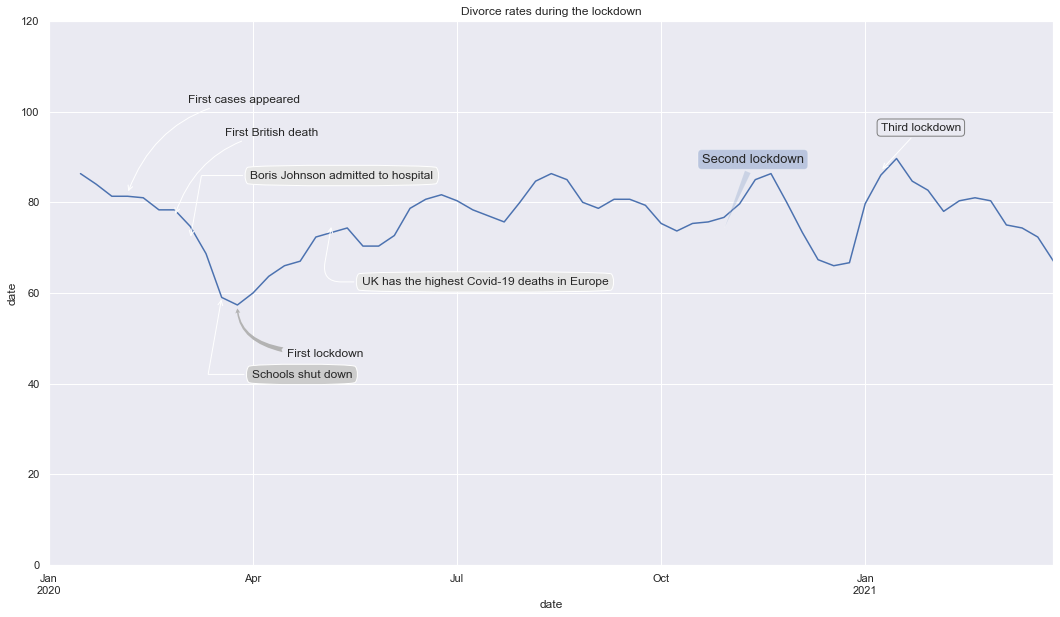

In [56]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(18, 10))
ma['Divorce-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 82),  xycoords='data', xytext=(60, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate("First British death", xy=('2020-02-28', 77),  xycoords='data', xytext=(50, 80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 72), xycoords='data', xytext=(60, 60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 59), xycoords='data', xytext=(30, -80), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 57),  xycoords='data', xytext=(50, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=90"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',75),  xycoords='data', xytext=(30, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Second lockdown', xy=('2020-10-31', 74),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.3), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.2,));

ax.annotate("Third lockdown", xy=('2021-01-06', 87),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, 40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Divorce rates during the lockdown',
       ylabel='date')
    
    
ax.set_ylim(0, 120);

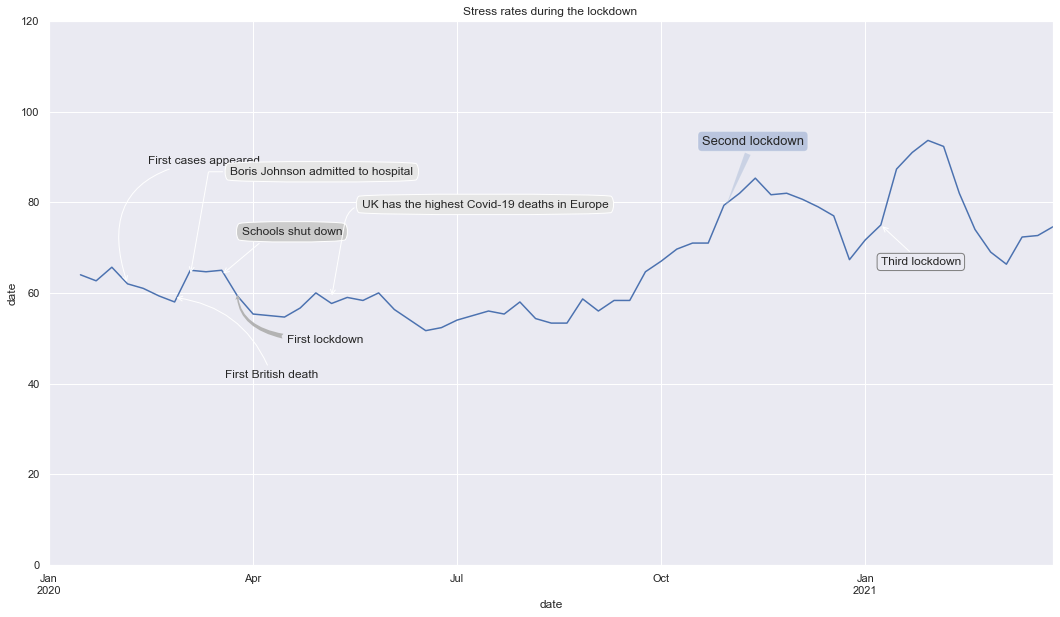

In [99]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(18, 10))
ma['Stress-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 62),  xycoords='data', xytext=(20, 120), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6"))

ax.annotate("First British death", xy=('2020-02-28', 59),  xycoords='data', xytext=(50, -80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 64), xycoords='data', xytext=(40, 100), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 64), xycoords='data', xytext=(20, 40), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=40,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 60),  xycoords='data', xytext=(50, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=90"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',59),  xycoords='data', xytext=(30, 90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Second lockdown', xy=('2020-10-31', 78),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.3), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.2,));

ax.annotate("Third lockdown", xy=('2021-01-06', 75),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Stress rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

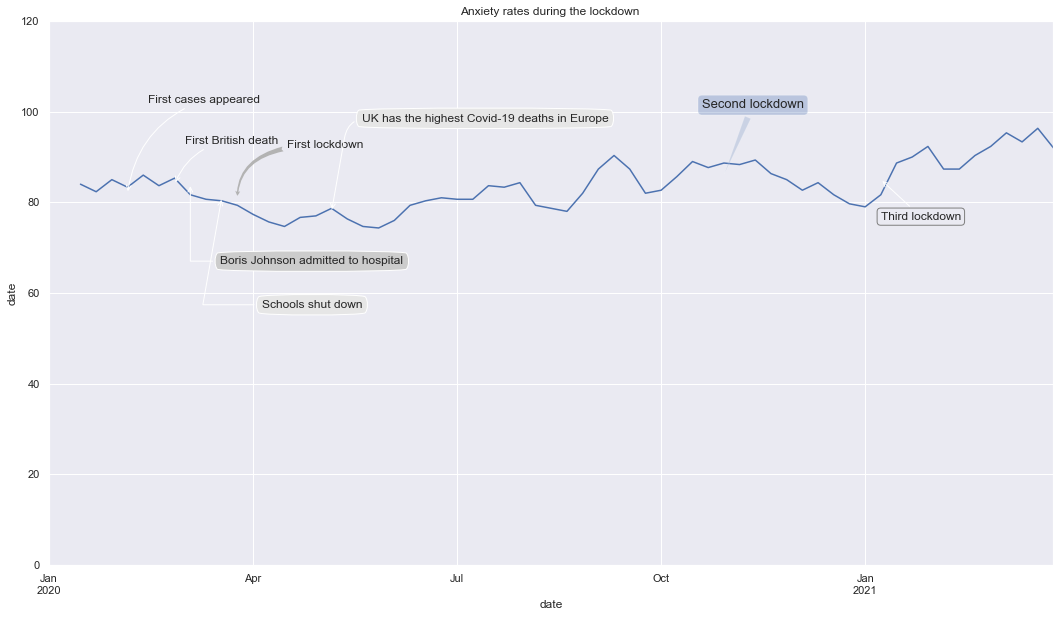

In [93]:
fig, ax = plt.subplots(figsize=(18, 10))
ma['Anxiety-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 82),  xycoords='data', xytext=(20, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate("First British death", xy=('2020-02-28', 84),  xycoords='data', xytext=(10, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 84), xycoords='data', xytext=(30, -80), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=0.1"))

ax.annotate('Schools shut down', xy=('2020-03-18', 81), xycoords='data', xytext=(40, -110), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 81),  xycoords='data', xytext=(50, 50), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=90"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',78),  xycoords='data', xytext=(30, 90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Second lockdown', xy=('2020-10-31', 86),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.3), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.2,));

ax.annotate("Third lockdown", xy=('2021-01-06', 85),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Anxiety rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

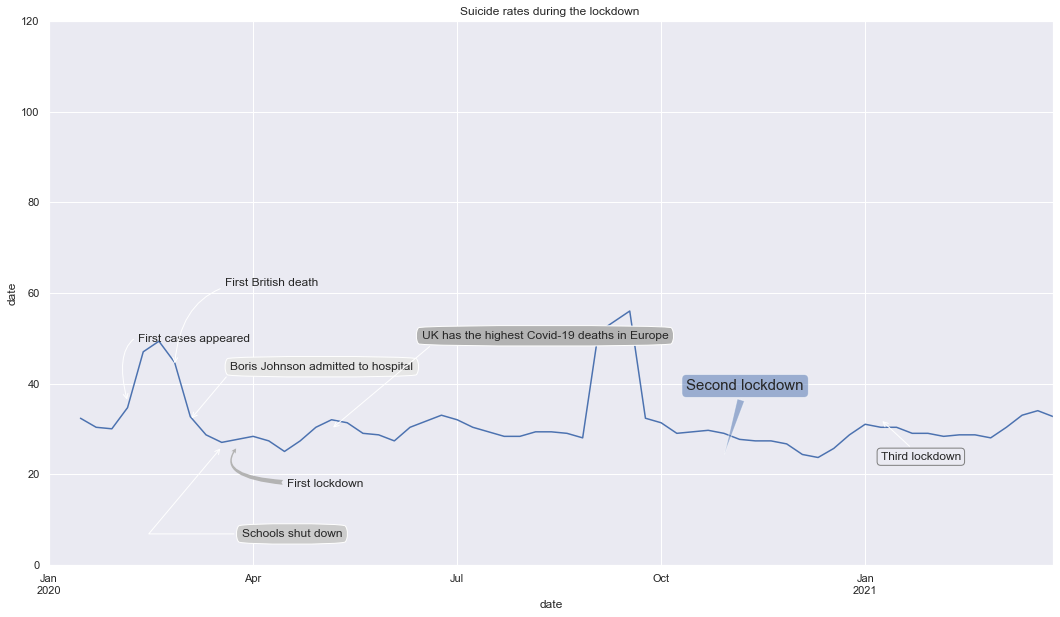

In [52]:
fig, ax = plt.subplots(figsize=(18, 10))
ma['Suicide-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 36),  xycoords='data', xytext=(10, 60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.9"))

ax.annotate("First British death", xy=('2020-02-28', 44),  xycoords='data', xytext=(50, 80), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 32), xycoords='data', xytext=(40, 50), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=50,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 26), xycoords='data', xytext=(20, -90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=50,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 26),  xycoords='data', xytext=(50, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=50"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',30),  xycoords='data', xytext=(90, 90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.7"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=40,rad=10"))


ax.annotate('Second lockdown', xy=('2020-10-31', 24),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=15, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.5), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5,));

ax.annotate("Third lockdown", xy=('2021-01-06', 32),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Suicide rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

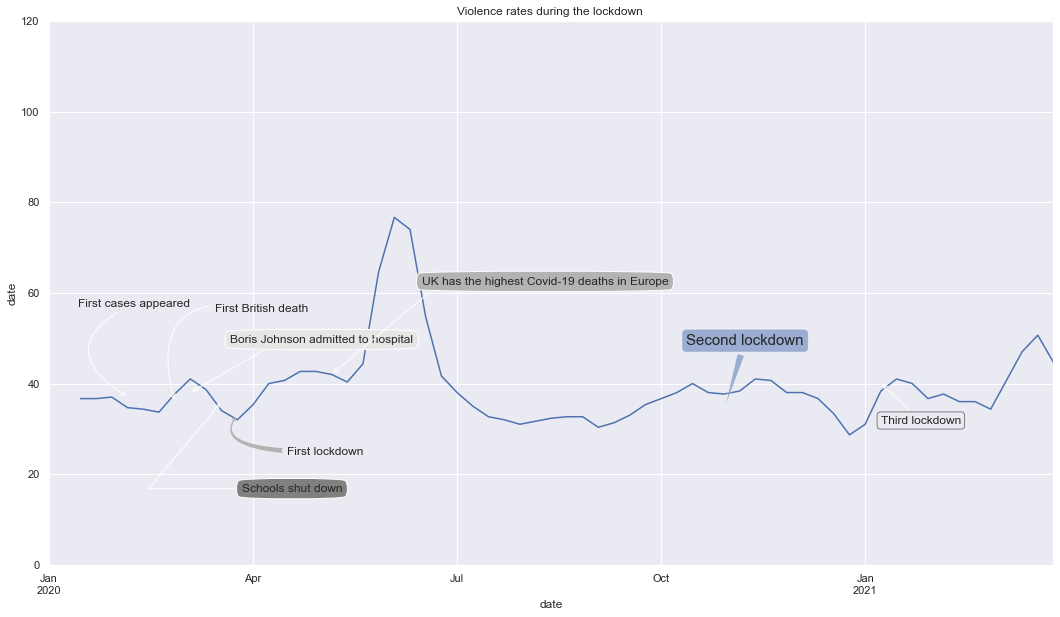

In [53]:
fig, ax = plt.subplots(figsize=(18, 10))
ma['Violence-UK'].plot(ax=ax)

# Add labels to the plot
ax.annotate("First cases appeared", xy=('2020-02-07', 37),  xycoords='data', xytext=(-50, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.9"))

ax.annotate("First British death", xy=('2020-02-28', 36),  xycoords='data', xytext=(40, 90), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"))

ax.annotate('Boris Johnson admitted to hospital', xy=('2020-03-05', 38), xycoords='data', xytext=(40, 50), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=30,rad=0.8"))

ax.annotate('Schools shut down', xy=('2020-03-18', 36), xycoords='data', xytext=(20, -90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.5"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=50,rad=0.3"))

ax.annotate('First lockdown', xy=('2020-03-23', 33),  xycoords='data', xytext=(50, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.7", ec="none", connectionstyle="angle3,angleA=0,angleB=50"))

ax.annotate('UK has the highest Covid-19 deaths in Europe', xy=('2020-05-05',42),  xycoords='data', xytext=(90, 90), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.7"), arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=40,rad=10"))


ax.annotate('Second lockdown', xy=('2020-10-31', 34),  xycoords='data', xytext=(80, 70), textcoords='offset points',
            size=15, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.5), arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5,));

ax.annotate("Third lockdown", xy=('2021-01-06', 40),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))



# Label the axes
ax.set(title='Violence rates during the lockdown ',
       ylabel='date')


ax.set_ylim(0, 120);

In [1]:

#31 Jan - First two cases confirmed
#28 Feb - First British death
# 11 Mar - Bank of England interest rate cut; Chancellor announces £30 billion measures to protect economy
# 18 Mar - Schools shut down
# 23 Mar - Lockdown
# 27 Mar - Both PM Boris Johnson and HS Matt Hancock tested positive
# 5 Mar - Boris johnson admitted to hospital
#8 April - Estimated peak of hospital deaths
# 5 May - Uk has the highest COVID-19 deaths in Europe
# 31 oct - second national lockdown 